## Principal Component Analysis(PCA)

Principal Componant Analysis is a mathematical concept and it is used to reduce the dimension of original feature space in machine learning.In this process, original high dimensional feature space is transformed(rotated) to new feature space called eigen space.

$ 
Number\ of\ samples = m \\ 
Original\ dimension\ = n \\~\\
\color{red} {Original\ feature\ space\ = (X)_{m\times n}} \\
\color{red} {Var(X)=C=\frac {X^TX}{n}}\\
\color{blue}{
One\ of\ principal\ component\ = (w)_{n\times 1}\ where\ w^Tw=I\ \\~\\
}
Projection\ of\ X\ on\ w\ = (Xw)_{m\times 1} \\
Coordinates\ of\ the\ projection\ in\ original\ feature\ space = (Xw)_{m\times 1} (w^T)_{1\times n}=(Xww^T)_{m\times n} \\~\\
\color{blue}{
L = ||X_{m\times n}-(Xww^T)_{m\times n}||\\
Var(Xw)=\frac {{(Xw)_{m\times 1}}^T(Xw)_{m\times 1}}{n}=\frac {w^TX^TXw}{n}=w^TCw \\~\\
Max[Var(Xw)]\ under\ w^Tw=I\ \\
}
Define\ g(w)=Var(Xw)-\lambda (w^Tw - I)\\
g(w)=w^TCw-\lambda (w^Tw - I)\\
\frac{\partial g(w)}{\partial w}=2Cw-2kw+0=2(Cw-kw)=0\\
\color{blue}{
Cw=kw\\
w\ is\ an\ eigen\ vector\ of\ covariance\ matrix\\~\\
}
Select\ p\ eigen\ vectors\ with\ highest\ eigen\ values.\\
Eigen vectors,V=V_{n\times p}\\
Eigen values,\Lambda=\Lambda_{1\times p}\\
\color{red} {Transformed\ feature\ space,X_T = X_{m\times n}V_{n\times p}=(XV)_{m\times p}}\\
\color{red} {
Var(X_T)=C_T=\frac {(XV)^T(XV)}{n}=\frac {V^TX^TXV}{n}=V^TCV
=
{\begin{bmatrix}
    {\lambda}_{1} & 0 & 0 & \dots  & 0 \\
    0 & {\lambda}_{2} & 0 & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \dots  & {\lambda}_{p}
\end{bmatrix}}_{p\times p}
=\Lambda\\~\\
\textit{No covariance in the transformed feature space(Independent orthogonal features)}
}
$



In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la

Original feature space(m by n) :
[[0 1]
 [1 1]
 [1 0]]

Original Covariance Matrix(n by n) :
[[1.  0.5]
 [0.5 1. ]]

Trace of original covariance matrix :
2.0

Eigen values of Original Covariance Matrix :
[1.5 0.5]

Eigen vectors of Original Covariance Matrix :
[[ 0.707 -0.707]
 [ 0.707  0.707]]

Transformed Feature Space(m by p) :
[[ 0.707  0.707]
 [ 1.414  0.   ]
 [ 0.707 -0.707]]

Transformed Covariance Matrix(p by p) : 
[[ 1.5 -0. ]
 [-0.   0.5]]

Trace of transformed covariance matrix : 
2.0



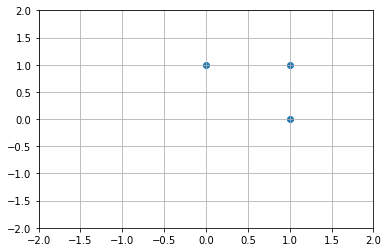

In [62]:
# Original feature matrix
# Rows(m) : data points
# Columns(n) : Features
# Shape = m by n
X = np.array([[0,1],
              [1,1],
              [1,0]])
print(f'Original feature space(m by n) :\n{X}\n')

# Original Dimension : 2
n = X.shape[1]

# Number of data points : 3
m = X.shape[0]

# Original covariance matrix
C = np.dot(np.transpose(X), X)/n

print(f'Original Covariance Matrix(n by n) :\n{C}\n')
print(f'Trace of original covariance matrix :\n{np.trace(C)}\n')

# Eigen values and eigen vectors of the original covariance matrix
lamda, V = la.eig(C)
V = np.round(V, 3)

# Retrieve eigen vectors from column >> Pricipal axis
v_1 = V[:,0] 
v_2 = V[:,1]

# Retrieve eigen values
lamda_1 = lamda[0]
lamda_2 = lamda[1]

print(f'Eigen values of Original Covariance Matrix :\n{lamda}\n')
print(f'Eigen vectors of Original Covariance Matrix :\n{V}\n')


"""Projection on principal axis"""
# Shape = m by p (p: number of selected principal components or eigen vectors)
X_transformed = np.dot(X, V) 
print(f'Transformed Feature Space(m by p) :\n{X_transformed}\n')
C_transformed = np.round(np.dot(np.transpose(X_transformed), X_transformed)/n, 3)
print(f'Transformed Covariance Matrix(p by p) : \n{C_transformed}\n')
print(f'Trace of transformed covariance matrix : \n{np.trace(C_transformed)}\n')

"""Graphical representation"""
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(-2,2)
plt.ylim(-2,2)

plt.grid()
plt.show()
